In [12]:
import numpy as np
import matplotlib.pyplot as plt
import czifile 
from roifile import ImagejRoi
from skimage.draw import polygon

In [ ]:
img_number = '01_3'
number_roi = '1_3'
file_path = rf'/Users/leon/Library/Mobile Documents/com~apple~CloudDocs/Privat/Marlen/Datenauswertung/data/Duodenum/20241220_VIPko_duodenum_dclk1_UEA1_{img_number}.czi'
roi_path = rf'/Users/leon/Library/Mobile Documents/com~apple~CloudDocs/Privat/Marlen/Datenauswertung/data/roi/duodenum_{number_roi}.roi'

with czifile.CziFile(file_path) as czi:
    image = czi.asarray()
image = np.squeeze(image)

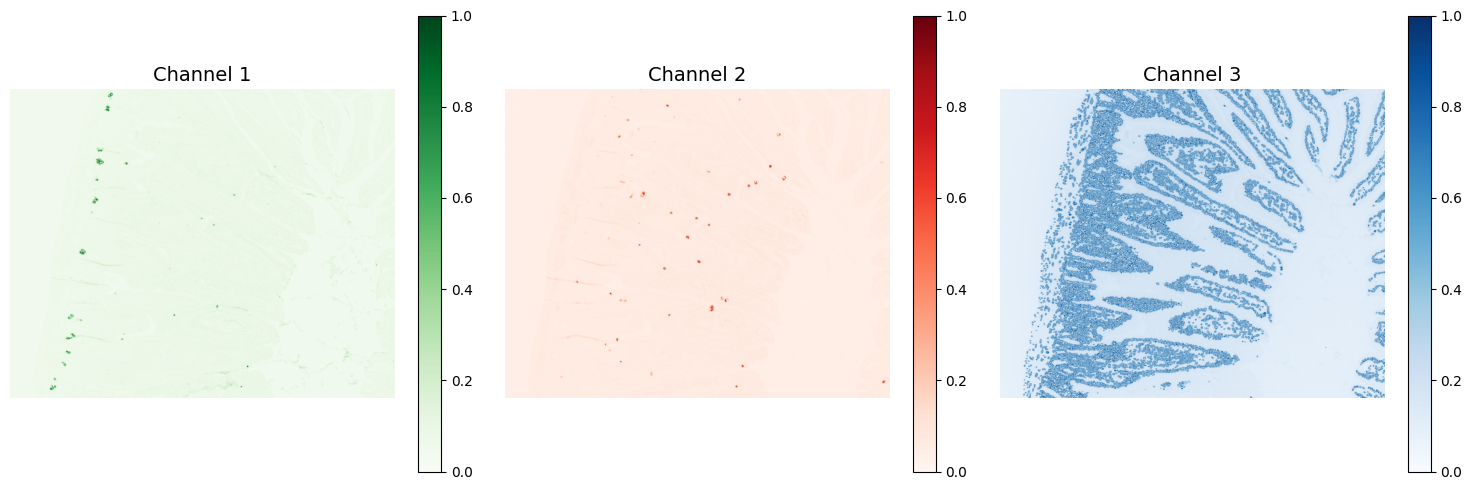

In [16]:
colors = ['Greens', 'Reds', 'Blues']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    selected_image = image[i] * 25
    normalized_image = (selected_image - np.min(selected_image)) / (np.max(selected_image) - np.min(selected_image))     # Normalize the image
    axes[i].imshow(normalized_image, cmap=colors[i])
    cbar = plt.colorbar(axes[i].imshow(normalized_image, cmap=colors[i]), ax=axes[i])
    axes[i].axis('off')
    axes[i].set_title(f"Channel {i+1}", fontsize=14)
plt.tight_layout()
plt.show()

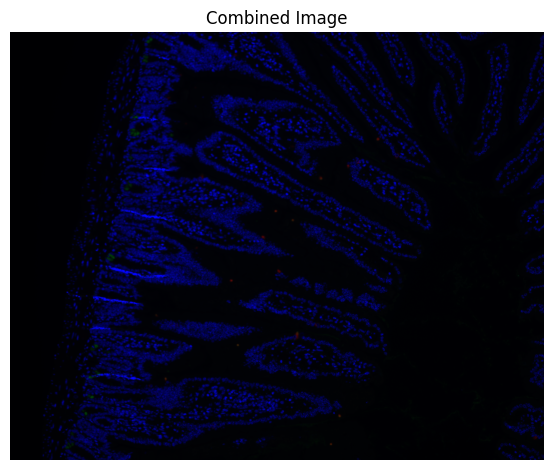

In [13]:
normalized_data = (image - np.min(image)) / (np.max(image) - np.min(image)) 
rgb_image = np.stack([normalized_data[1], normalized_data[0], normalized_data[2]], axis=-1)

plt.imshow(rgb_image)
plt.title("Combined Image")
plt.axis('off')
plt.tight_layout()
plt.show()

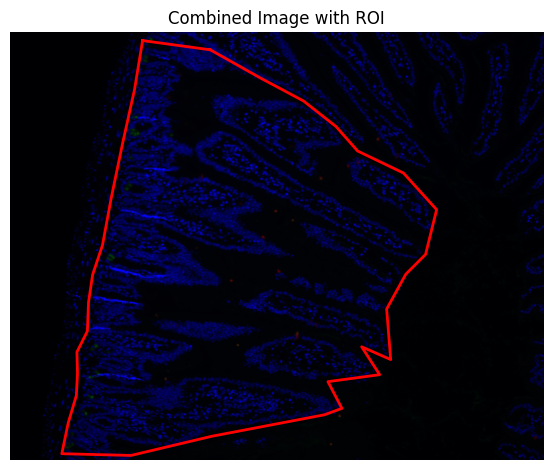

In [15]:
roi = ImagejRoi.fromfile(roi_path)
roi_coords = roi.coordinates()

closed_coords = np.vstack([roi_coords, roi_coords[0]])
mask = np.zeros_like(rgb_image[..., 0], dtype=bool)
rr, cc = polygon(closed_coords[:, 1], closed_coords[:, 0], shape=mask.shape)
mask[rr, cc] = True
masked_rgb_image = mask[..., None] * rgb_image


plt.imshow(rgb_image)
plt.plot(closed_coords[:, 0], closed_coords[:, 1], color="red", linewidth=2)
plt.axis('off')
plt.title("Combined Image with ROI")
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.imshow(normalized_data[1], cmap='gray')
coords = []

def onclick(event):
    if event.xdata and event.ydata:
        coords.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'ro')
        fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
print(coords)